In [1]:
## Imports

import networkx as nx
import matplotlib.pyplot as plt
import math

Type file name: group3.txt
Type number of people per group: 6
Total 34
Names:  {0: 'Sangha,A', 1: 'Ultra,B', 2: 'RAbbit,C', 3: 'Peter,D', 4: 'Time,E', 5: 'Theo,E', 6: 'Ghot,G', 7: 'Time,T', 8: 'Right,R', 9: 'Eater,Q', 10: 'Haunted,H', 11: 'Bee,F', 12: 'Space,S', 13: 'Yay,Y', 14: 'Leo,L', 15: 'Queen,Q', 16: 'House,H'}
Iteration  0 : {'Sangha,A': ['Ultra,B', 'RAbbit,C'], 'Peter,D': ['Time,E', 'Theo,E'], 'Ghot,G': ['Time,T', 'Right,R'], 'Eater,Q': ['Haunted,H', 'Bee,F'], 'Space,S': ['Yay,Y', 'Leo,L'], 'Queen,Q': ['House,H']}
Iteration  1 : {'Ultra,B': ['Sangha,A', 'RAbbit,C'], 'Time,E': ['Peter,D', 'Theo,E'], 'Time,T': ['Ghot,G', 'Right,R'], 'Haunted,H': ['Eater,Q', 'Bee,F'], 'Yay,Y': ['Space,S', 'Leo,L'], 'House,H': ['Queen,Q']}
Iteration  2 : {'RAbbit,C': ['Sangha,A', 'Ultra,B'], 'Theo,E': ['Peter,D', 'Time,E'], 'Right,R': ['Ghot,G', 'Time,T'], 'Bee,F': ['Eater,Q', 'Haunted,H'], 'Leo,L': ['Space,S', 'Yay,Y'], 'Queen,Q': ['House,H']}
Iteration  3 : {'Queen,Q': ['Sangha,A', 'Ultra,B'], 'H

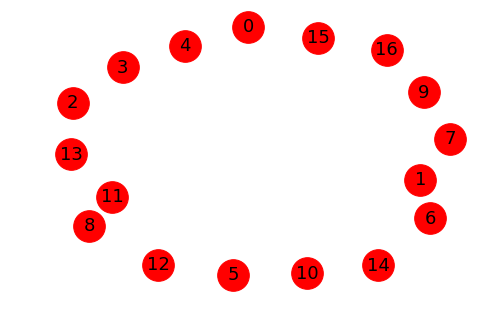

In [28]:
def read_names(file_name):
    names = []

    # TODO
    
    return names

# [A, B, 'C,D'] => returns 4
def prepare_G(names):
    total_count = 0
    G = nx.DiGraph()
    num_to_name = {}
                
    # TODO: 
    
    
    return G, num_to_name, total_count

def find_solution(G, total_count, GROUP_SIZE, num_to_name):
    return G, 0


def plot_graph(G):
    nx.draw(G, with_labels=True, node_color='red', font_size=18, width=3,node_size=1000)


# take second element for sort
def takeSecond(elem):
    return elem[1]

def get_neighbors_who_are_not_any_group(host, already_visited, G):
    visitors = list(G.predecessors(host)) # get all the neighbors visited
    for i in already_visited:
        if i in visitors:
            visitors.remove(i)
    return visitors

def find_solution(G, total_count, group_size, num_to_names):
    num_groups = math.floor(total_count / group_size)
    if total_count % group_size != 0:
        num_groups += 1
    iteration = 0

    #O(e)
    while(G.number_of_edges() > 0):
        visited_hosts = []
        visited_nodes = []
        hosts_to_visitors = {}
        groups = 0

        # We will do this until we fill all the groups O(n)
        while(groups < num_groups):
        
            # sort the nodes by indegree ascending
            nodes_with_indegree = list(G.in_degree())
            nodes_with_indegree.sort(key=takeSecond, reverse=True)

            # pick one node 
            host, degree = nodes_with_indegree.pop(0)
            # representation, so the library probably needs to look at all of nodes that are toward the host.
            visitors = get_neighbors_who_are_not_any_group(host, visited_nodes, G)

            # check if the node is already a host, or all the neighbors are part of other groups
            # if fails, then pick another node. Keep searching
            while (host in visited_nodes or len(visitors) == 0) and len(nodes_with_indegree) > 0:
                host, degree = nodes_with_indegree.pop(0)
                visitors = get_neighbors_who_are_not_any_group(host, visited_nodes, G)

            # If there is no more hosts left, then we are DONE...
            if (len(nodes_with_indegree) == 0):
                break;

            # pick the neighbors to fill the group with group_size
            number_of_people_in_group = 2 if ("," in num_to_names[host]) else 1
            chosen_visitors = []
            while number_of_people_in_group < group_size:
                if (len(visitors) == 0):
                    break;
                visitor = visitors.pop(0)
                chosen_visitors += [visitor]
                number_of_people_in_group += 2 if ("," in num_to_names[visitor]) else 1

            # Remove the chosen edges (visitor, host) for all the chosen visitors
            for visitor in chosen_visitors:
                if G.has_edge(visitor, host):
                    G.remove_edge(visitor, host)

            visited_hosts += [host]
            visited_nodes += chosen_visitors
            visited_nodes += [host]
            groups += 1
            hosts_to_visitors[host] = chosen_visitors
            
        # 1. Create a list of unvisited nodes = (nodes - visited_nodes) [1, 2, 3] - [1] 
        unvisited_nodes = []
        nodes = list(G.nodes)

        #O(n)
        for i in nodes:
            if i not in visited_nodes:
                unvisited_nodes += [i]
        # 2. Iterate through hosts_to_visitors (it's a dictionary). 
        # If the host + its visitors are less than group_size, then add some from unvisited_nodes until it becomes equal to group_size
        # O(n^2)
        for i in hosts_to_visitors:
            number_of_people_in_group = 2 if ("," in num_to_names[i]) else 1
            for j in range(len(hosts_to_visitors[i])):
                number_of_people_in_group += 2 if ("," in num_to_names[j]) else 1

            while number_of_people_in_group < group_size:
                if len(unvisited_nodes) == 0:
                    break
                new_visitor = unvisited_nodes.pop(0)
                hosts_to_visitors[i].append(new_visitor)
                number_of_people_in_group += 2 if ("," in num_to_names[new_visitor]) else 1

        #3. If the total number of groups (look at variable 'groups') is less than num_groups, 
        #then create groups ('num_groups' - 'groups' many; for instance, if there are total 3 groups, 
        #but only 1 group made so far, then you need to create two more groups) using the rest of unvisited_nodes.
        if groups < num_groups:
            for i in range(groups, num_groups):
                if len(unvisited_nodes) == 0:
                    break
                hostPerson = unvisited_nodes.pop(0)
                sizeOfHost = 2 if ("," in num_to_names[hostPerson]) else 1
                hosts_to_visitors[hostPerson] = []
                visitedPeopleAmount = 0
                while sizeOfHost + visitedPeopleAmount < group_size:
                    if len(unvisited_nodes) == 0:
                        break
                    visitor = unvisited_nodes.pop(0)
                    visitedPeopleAmount += 2 if ("," in num_to_names[visitor]) else 1
                    hosts_to_visitors[hostPerson].append(visitor)
            
        hosts_to_visitors_in_strings = {}
        for i in hosts_to_visitors:
            hosts_to_visitors_in_strings[num_to_names[i]] = [num_to_names[v] for v in hosts_to_visitors[i]]

        print("Iteration ", iteration, ":", hosts_to_visitors_in_strings)
        
        iteration += 1
    return G

def verify(G):
    # check G has no edges
    print("VERIFY RESULT:", G.number_of_edges() == 0)

def main():
    file_name = input("Type file name: ")
    group_size = int(input("Type number of people per group: "))
    
    # 1. Read the names and create array of names
    # File: A\n B\n C,D => ['A', 'B', 'C,D']
    names = read_names(file_name)
    
    # 2. Create a fully connected graph G
    # Number of nodes = 3 where couple is one node
    # Each node is indexed as 0, 1, 2
    # Also return num_to_name {0 => 'A', 1 => 'B', 2 => ['C', 'D']}
    # total_count = number of people = 4 people total
    G, num_to_name, total_count = prepare_G(names)
    print("Total", total_count)
    print("Names: ", num_to_name)

    # 3. run the algorithm
    # final_G is the graph created by the algorithm
    # G is the graph that should have no edges left
    G = find_solution(G, total_count, group_size, num_to_name)
    plot_graph(G)
    
    # 4. verify that final_G is empty
    verify(G)
    
main()